<a href="https://colab.research.google.com/github/PiuChu/ResilienceForest/blob/main/Percentage_of_Valid_MODISNDVI_Pixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code was used to calculate the percentage of valid pixels from this file (MODIS/061/MOD13A2). The calculation was done within areas coresponding to the IFL_2000 global forest dataset.

In [ ]:
# Install the Earth Engine API
!pip install earthengine-api

In [1]:
# Import the Earth Engine library and authenticate
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-pnnwachukwu17')

In [36]:
# Define a study area: an example bounding box (adjust coordinates as needed)
study_area = ee.Geometry.Polygon([
  #  [[19.85, -3.16], [19.85, -1.31], [22.39, -1.31], [22.39, -3.16], [19.85, -3.16]]  # Ensure the polygon is closed by repeating the first coordinate
    #  [[101.23, 29.02], [101.23, 29.54], [102.10, 29.54], [102.10, 29.02], [101.23, 29.02]]  #
  #  [[122.37, -33.08], [122.37, -32.49], [122.85, -32.49], [122.85, -33.08], [122.37, -33.08]]  #
    # [[22.45, 45.12], [22.45, 45.47], [22.97, 45.47], [22.97, 45.12], [22.45, 45.12]]  #
    # [[-121.68, 48.02], [-121.68, 49.01], [-119.80, 49.01], [-119.80, 48.02], [-121.68, 48.02]]  #
    [[-60.70, -9.18], [-60.70, -7.56], [-58.42, -7.56], [-58.42, -9.18], [-60.70, -9.18]]

])

In [37]:
# Define the date range
start_date = '2000-02-01'
end_date = '2024-04-30'

# Load MODIS NDVI data
modis_ndvi = ee.ImageCollection('MODIS/061/MOD13A2') \
               .filterDate(start_date, end_date) \
               .filterBounds(study_area) \
               .select('NDVI')


In [38]:
# Function to calculate the percentage of valid NDVI pixels
def calculate_valid_percentage(image):
    # Mask invalid NDVI values (e.g., -3000) and consider valid values (e.g., greater than -3000)
    valid_pixels = image.gt(-3000)
    total_pixels = image.unmask().reduceRegion(
        reducer=ee.Reducer.count(),
        geometry=study_area,
        scale=1000,
        maxPixels=1e9
    ).values().get(0)

    valid_pixel_count = valid_pixels.reduceRegion(
        reducer=ee.Reducer.count(),
        geometry=study_area,
        scale=1000,
        maxPixels=1e9
    ).values().get(0)

    percentage_valid = ee.Number(valid_pixel_count).divide(ee.Number(total_pixels)).multiply(100)
    return image.set('percentage_valid', percentage_valid).set('date', image.date().format('YYYY-MM-dd'))


In [5]:
# -3000/10000 # Spectral conversion for the NDVI

-0.3

In [39]:
# Apply the function to the image collection
valid_percentages = modis_ndvi.map(calculate_valid_percentage)

# Extract the dates and percentages separately
dates = valid_percentages.aggregate_array('date').getInfo()
percentages = valid_percentages.aggregate_array('percentage_valid').getInfo()

# Combine the results into a list of dictionaries
results = [{'date': date, 'percentage_valid': percentage} for date, percentage in zip(dates, percentages)]

# Print the results
print(results)

[{'date': '2000-02-18', 'percentage_valid': 100}, {'date': '2000-03-05', 'percentage_valid': 100}, {'date': '2000-03-21', 'percentage_valid': 100}, {'date': '2000-04-06', 'percentage_valid': 100}, {'date': '2000-04-22', 'percentage_valid': 100}, {'date': '2000-05-08', 'percentage_valid': 100}, {'date': '2000-05-24', 'percentage_valid': 100}, {'date': '2000-06-09', 'percentage_valid': 100}, {'date': '2000-06-25', 'percentage_valid': 100}, {'date': '2000-07-11', 'percentage_valid': 100}, {'date': '2000-07-27', 'percentage_valid': 100}, {'date': '2000-08-12', 'percentage_valid': 100}, {'date': '2000-08-28', 'percentage_valid': 100}, {'date': '2000-09-13', 'percentage_valid': 100}, {'date': '2000-09-29', 'percentage_valid': 100}, {'date': '2000-10-15', 'percentage_valid': 100}, {'date': '2000-10-31', 'percentage_valid': 100}, {'date': '2000-11-16', 'percentage_valid': 100}, {'date': '2000-12-02', 'percentage_valid': 100}, {'date': '2000-12-18', 'percentage_valid': 100}, {'date': '2001-01-0

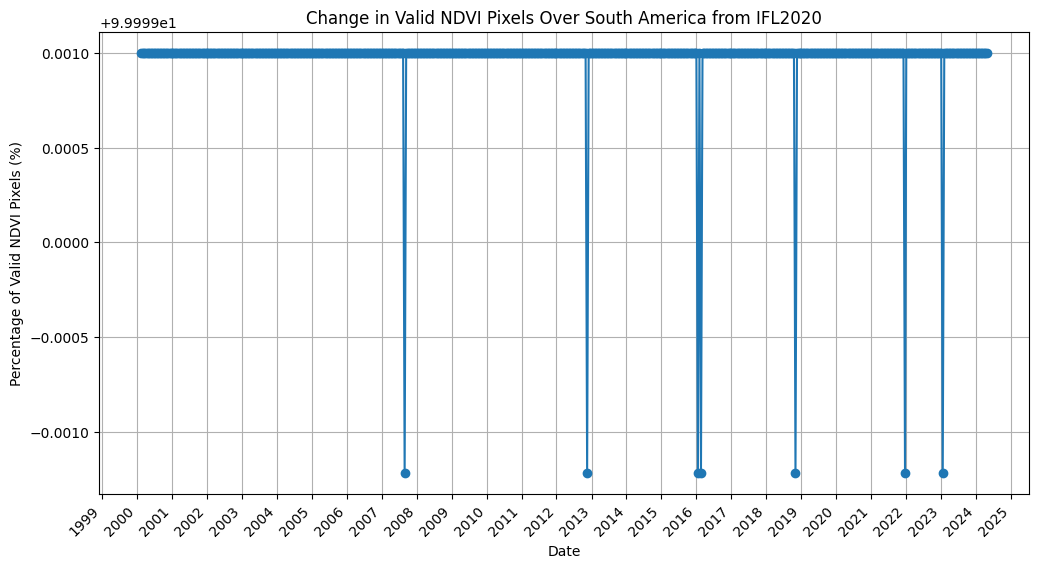

In [41]:
# Visualization
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates as mdates # Import the mdates module

# Extract dates and valid percentages
dates = [entry['date'] for entry in results]
valid_percentages = [entry['percentage_valid'] for entry in results]

# Convert string dates to datetime objects
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dates, valid_percentages, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Percentage of Valid NDVI Pixels (%)')
plt.title('Change in Valid NDVI Pixels Over South America from IFL2020')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) # Now mdates is accessible
# Tilt x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
# To convert percentages to be between 0 and 100
valid_percentages = [percentage * 100 for percentage in valid_percentages]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dates, valid_percentages, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Percentage of Valid NDVI Pixels (%)')
plt.title('Change in Valid NDVI Pixels Over South America from IFL2020')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, ha='right')

# Format y-axis to show percentages without decimals
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Show the plot
plt.show()